#Ai assignment 
#Hamad Islam Maghaireh 0204486


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

In [2]:
traffic=pd.read_csv('Traffic.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Traffic.csv'

In [ ]:
#getting the csv file and read it 

In [ ]:
traffic[['hour_min','am_pm']]=traffic['Time'].str.split(expand=True)
traffic= traffic.drop('Time',axis=1)
traffic.info()
traffic.shape


In [ ]:
#we used .shape so we can see that our dataset contains from 2976 row and 8 columns 
#we used .info so we can see that we have missing data in the dataset in some columns such as CarCount,BikeCount,BusCount,TruckCount

In [ ]:
traffic.hist(bins=50, figsize=(12, 8),color="royalblue")
plt.show()
traffic.describe()

In [ ]:
#the Plot shows the numeric features in the dataset and how they are distributed 

In [ ]:
c= traffic['CarCount'].sum() 
bi= traffic['BikeCount'].sum()
bu= traffic['BusCount'].sum()
t =traffic['TruckCount'].sum()
Count =[c,bi,bu,t]
cc= ['Car Count','Bike Count','Bus Count','Truck Count']
col =['teal','darkviolet','mediumblue','aqua']
wp= {'linewidth' : 0.8, 'edgecolor' : 'black'}
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    
plt.pie(Count,labels=cc,colors=col,wedgeprops = wp,autopct=autopct_format(Count))
plt.title("Vehicles Count",weight='bold')
plt.show()

In [ ]:
sns.set_theme()
sns.countplot(traffic,x="Traffic Situation",hue="am_pm",palette="rocket_r")

In [ ]:
traffic.isnull().sum()

In [ ]:
#form using th isnull() we find that there is missing data so we need to handle the missing featurs 

In [ ]:
trafficD =traffic.drop("Traffic Situation",axis=1)
traffic_label = traffic["Traffic Situation"].copy()
trafficD.shape

In [3]:
from sklearn.pipeline import Pipeline

label_encoder = preprocessing.LabelEncoder()
traffic_label_encoded =label_encoder.fit_transform(traffic_label)


num_attribs= ["Date","CarCount","BikeCount","BusCount","TruckCount","Total"]
cat_attribs= ["Day of the week","am_pm","hour_min"]


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

traffic_prepared= full_pipeline.fit_transform(trafficD)
final_traffic=pd.DataFrame(traffic_prepared,columns= full_pipeline.get_feature_names_out())
full_pipeline.get_feature_names_out()

NameError: name 'traffic_label' is not defined

In [14]:
#after the sepertaion of the label from the respnose the cell above we did label encoding for the label the we didi full pipieline to the features
#the full pipeline that was made from a numeric features pipeline to handle the numeric values and we used in it the standards scaling and for the categorical features we used the ordinal encoder directly 
#and we combined the features names with the numbers the we got from the pipline and the final data is ready  

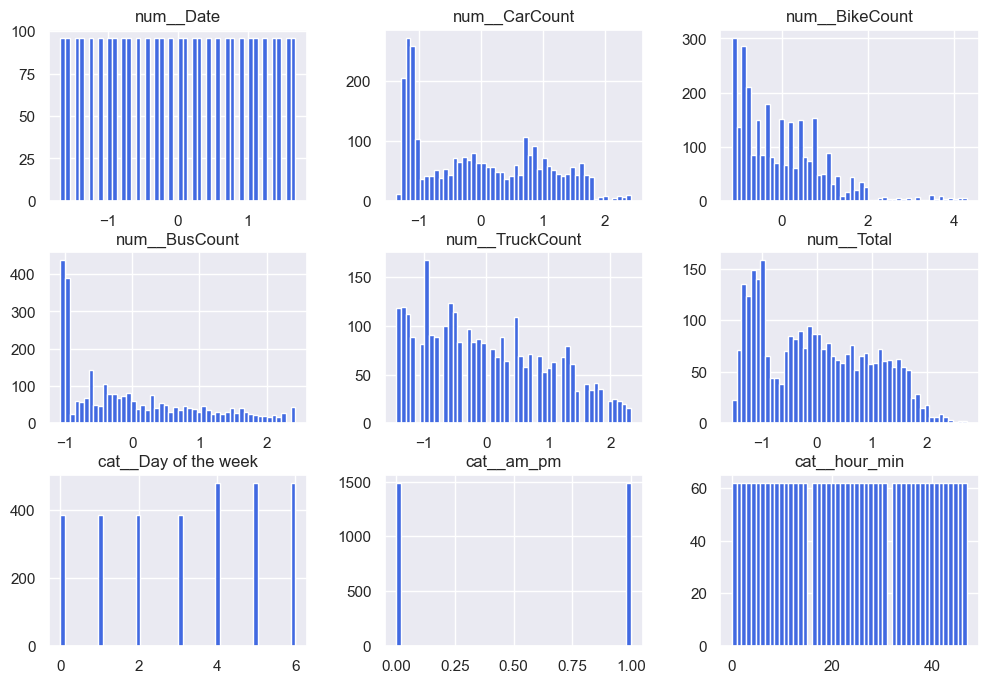

In [15]:
final_traffic.hist(bins=50, figsize=(12, 8),color="royalblue")
plt.show()

In [16]:
final_traffic.describe()


,num__Date,num__CarCount,num__BikeCount,num__BusCount,num__TruckCount,num__Total,cat__Day of the week,cat__am_pm,cat__hour_min
count,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2976.000000,2976.000000,2976.000000
mean,5.730183e-17,-2.268198e-17,6.207699e-17,5.192979e-17,-8.356517e-18,-7.162729e-18,3.193548,0.500000,23.500000
std,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,1.000168e+00,2.007090,0.500084,13.855727
min,-1.677051e+00,-1.367579e+00,-1.161136e+00,-1.065612e+00,-1.445654e+00,-1.548980e+00,0.000000,0.000000,0.000000
25%,-8.944272e-01,-1.083826e+00,-7.716303e-01,-9.958113e-01,-8.790444e-01,-9.840131e-01,1.000000,0.000000,11.750000
50%,0.000000e+00,-1.016034e-01,-2.263219e-01,-2.280020e-01,-1.235650e-01,-8.671269e-02,3.000000,0.500000,23.500000
75%,8.944272e-01,8.369645e-01,5.526902e-01,6.794089e-01,7.263492e-01,8.272044e-01,5.000000,1.000000,35.250000
max,1.677051e+00,2.430347e+00,4.291948e+00,2.424430e+00,2.331743e+00,2.738122e+00,6.000000,1.000000,47.000000


In [17]:
#the plot above shows every numeric feature after scaling it and the encoding for the categorical features and shows how ther  are distributed 

In [18]:
final_traffic["Traffic Situation"]=traffic_label_encoded
final_traffic.shape
final_traffic.info()
final_traffic['Traffic Situation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num__Date             2976 non-null   float64
 1   num__CarCount         2976 non-null   float64
 2   num__BikeCount        2976 non-null   float64
 3   num__BusCount         2976 non-null   float64
 4   num__TruckCount       2976 non-null   float64
 5   num__Total            2976 non-null   float64
 6   cat__Day of the week  2976 non-null   float64
 7   cat__am_pm            2976 non-null   float64
 8   cat__hour_min         2976 non-null   float64
 9   Traffic Situation     2976 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 221.0 KB


Traffic Situation
3    1669
0     682
1     321
2     304
Name: count, dtype: int64

In [19]:
#we added the label again to the final dataset so we can see the  Correlations between the features 

In [20]:
corr_matrix = final_traffic.corr()
corr_matrix["Traffic Situation"].sort_values(ascending=False)


Traffic Situation       1.000000
num__TruckCount         0.494015
num__Date               0.008981
cat__Day of the week    0.008125
cat__am_pm             -0.079529
cat__hour_min          -0.382010
num__BikeCount         -0.614706
num__BusCount          -0.703915
num__CarCount          -0.747024
num__Total             -0.781925
Name: Traffic Situation, dtype: float64

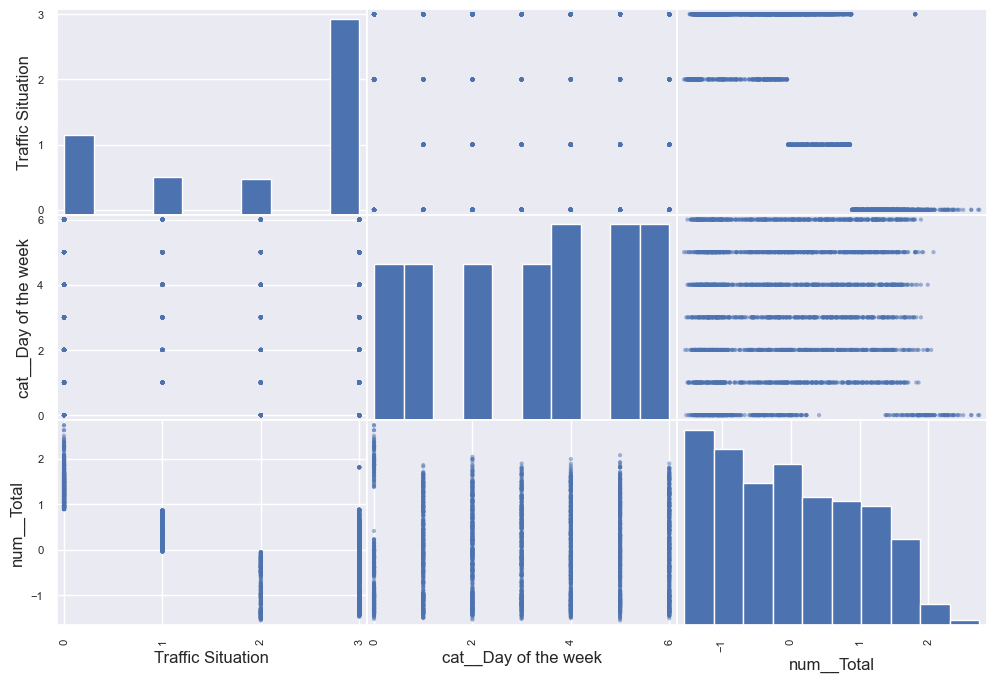

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['Traffic Situation','cat__Day of the week','num__Total']
scatter_matrix(final_traffic[attributes], figsize=(12, 8))
plt.show()

In [22]:
#we  find the Correlations
#and they are found and shown and the plots above show the relation between the labe and other features and we can see that the correlations between 
#the traffic situation and the number of truck is higher than the other features so we know that the number of trucks is an indicator of the traffic situation 


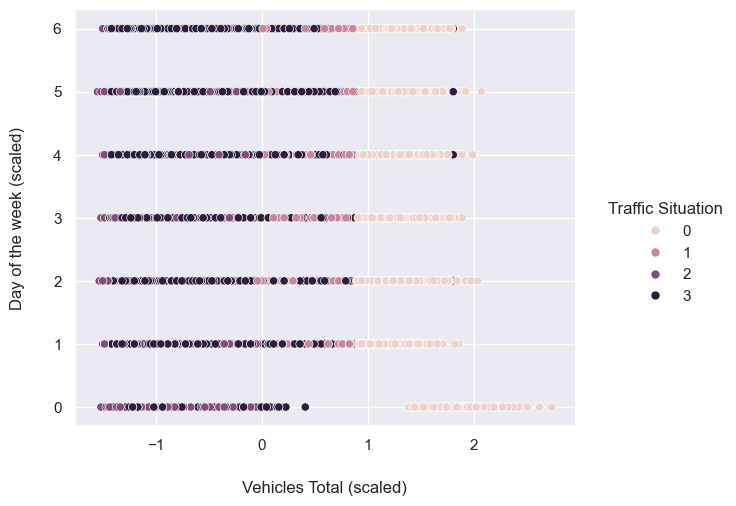

In [23]:
Total_Day =sns.relplot(data=final_traffic ,x='num__Total',y='cat__Day of the week',hue='Traffic Situation')
Total_Day.set_axis_labels('Vehicles Total (scaled)','Day of the week (scaled)',labelpad=20)
Total_Day.figure.set_size_inches(7.5,5)

In [24]:
#the plot above shows the relation between the total vehicles and the day of the week after scaling 
#as we can see the with the increase in vehicles in the day the traffic situation becomes heavier 

In [25]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
for train,test in sss.split(final_traffic,final_traffic['Traffic Situation']):
    train_set =final_traffic.iloc[train]
    test_set  =final_traffic.iloc[test]

print('train_set = ',len(train_set))
print('test_set  = ',len(test_set))

test_x = test_set.drop('Traffic Situation',axis=1)
test_y = test_set['Traffic Situation'].copy()
train_x = train_set.drop('Traffic Situation',axis=1)
train_y = train_set['Traffic Situation'].copy()

print (final_traffic.shape , "," , train_x.shape , ",", test_x.shape) 

train_set =  2380
test_set  =  596
(2976, 10) , (2380, 9) , (596, 9)


In [26]:
#at last we split the data so we can train a model 

#Assignment 2 starts here

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score ,f1_score

# Logistic Regression Classifier :

### first we start logistic regression classifier and we try differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [28]:
log_reg = LogisticRegression(random_state=42)
log_param = [{'C' : [1,10,50] , 'max_iter' : [2000,5000,10000]}]
grid_search = GridSearchCV(log_reg,log_param,cv=3,scoring='accuracy')
grid_search.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [1, 10, 50], 'max_iter': [2000, 5000, 10000]}],
             scoring='accuracy')

In [29]:
grid_search.best_params_

{'C': 50, 'max_iter': 2000}

In [30]:
log_reg=grid_search.best_estimator_

In [31]:
print ('Accuarcy for Logistic Regression = ', grid_search.best_score_)

Accuarcy for Logistic Regression =  0.9075617573160621


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

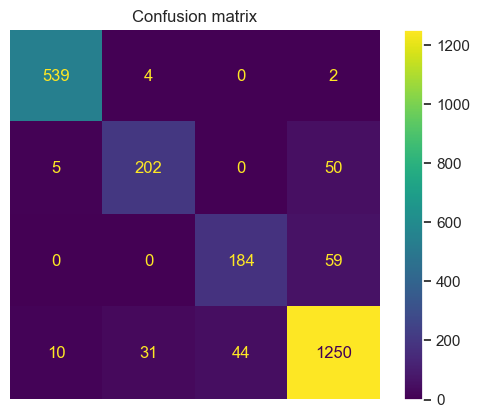

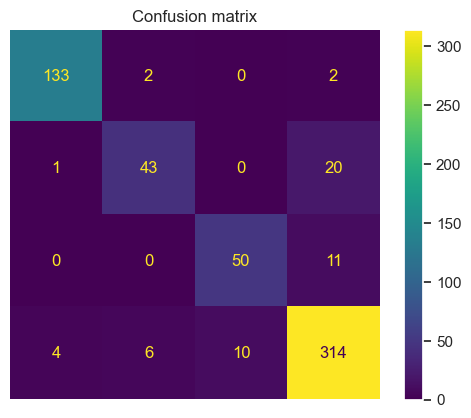

In [32]:
train_pred_y = grid_search.predict(train_x)
test_pred_y = grid_search.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y,)
plt.axis('off')
plt.title("Confusion matrix")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y)
plt.title("Confusion matrix")
plt.axis('off')
plt.show()

### Evalute the performance of the classifier by doing ROC curve showing a specifc class (One Vs All) which is trade off between true positive rate and false positive 

In [35]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
label_binarizer1 = LabelBinarizer().fit(train_pred_y)
y_score = label_binarizer1.transform(test_pred_y)

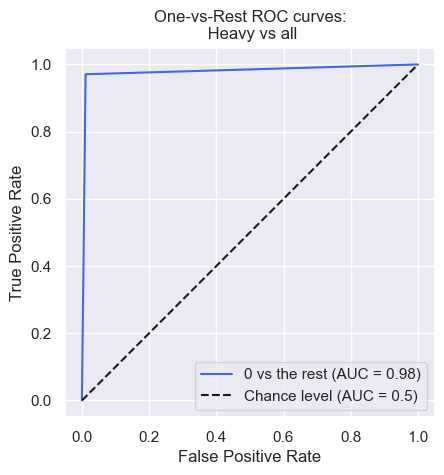

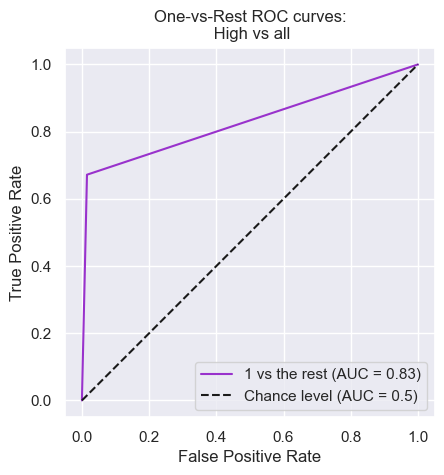

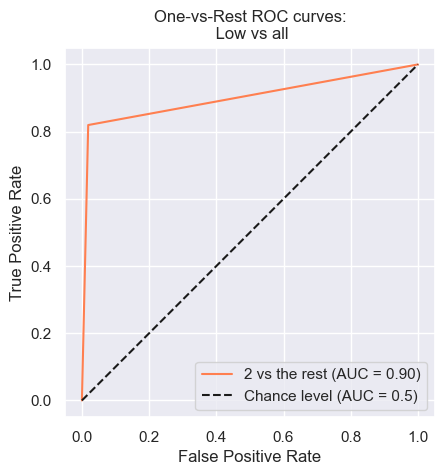

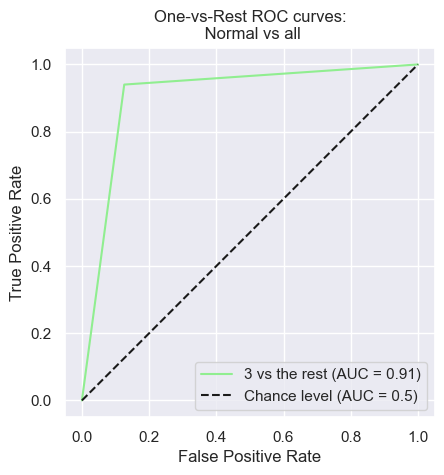

In [36]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="royalblue",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Heavy vs all")
plt.legend()
plt.show()

class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorchid",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n High vs all")
plt.legend()
plt.show()

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="coral",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Low vs all")
plt.legend()
plt.show()

class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="lightgreen",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Normal vs all")
plt.legend()
plt.show()



# Support Vector Classifier

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for the it

In [37]:
svc_clf = SVC(random_state=42)
svc_param = [{'C':[10,50,100],'kernel':['linear','poly','rbf'],'degree':[1,2,3]
             }]
grid_search1 = GridSearchCV(svc_clf,svc_param,cv=3,scoring='accuracy')
grid_search1.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [10, 50, 100], 'degree': [1, 2, 3],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy')

In [38]:
grid_search1.best_params_

{'C': 50, 'degree': 1, 'kernel': 'linear'}

In [39]:
svc=grid_search1.best_estimator_

In [40]:
print ('Accuarcy for SVC = ', grid_search1.best_score_)

Accuarcy for SVC =  0.9126027170995582


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

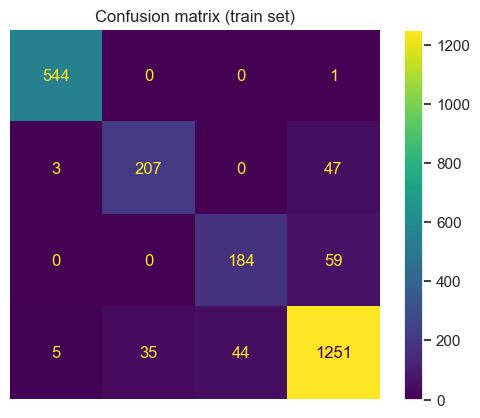

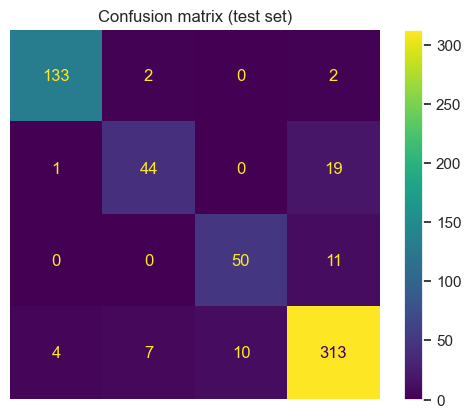

In [41]:
train_pred_y1 = grid_search1.predict(train_x)
test_pred_y1 = grid_search1.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y1)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y1)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

# Decision Tree Classifier :

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [42]:
from sklearn.tree import DecisionTreeClassifier

DTC_clf =  DecisionTreeClassifier(random_state=42)
DTC_param = [{'splitter':['best','random'],'max_depth':[2,3,5],
              'criterion':['gini','entropy','log_loss']
             }]
grid_search2 = GridSearchCV(DTC_clf,DTC_param,cv=3,scoring='accuracy')
grid_search2.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 5],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [43]:
grid_search2.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [44]:
DTC= grid_search2.best_estimator_

In [45]:
print ('Accuarcy for DTC = ', grid_search2.best_score_)

Accuarcy for DTC =  0.9983186212694409


### showing the tree structure for the decision tree classifier (best estimator)

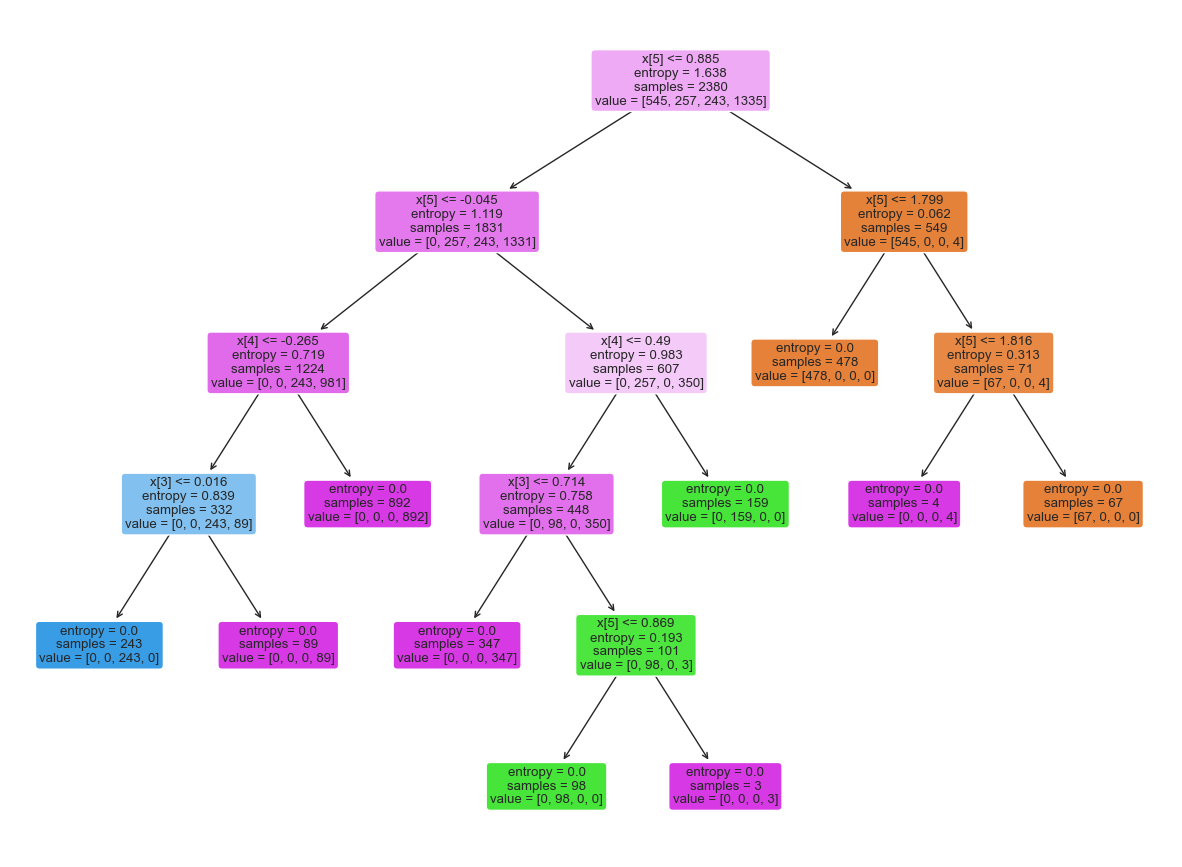

In [46]:
from sklearn import tree
plt.figure(figsize=(15,11))
tree.plot_tree(DTC,filled=True,rounded=True)
plt.show()

### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

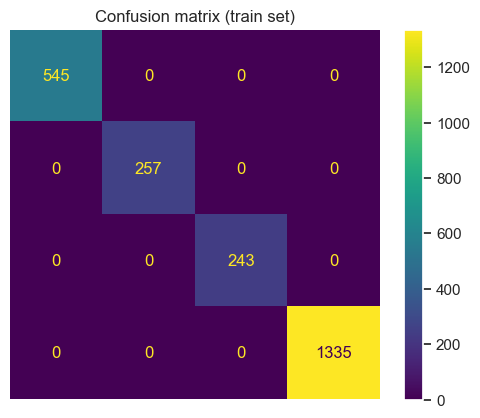

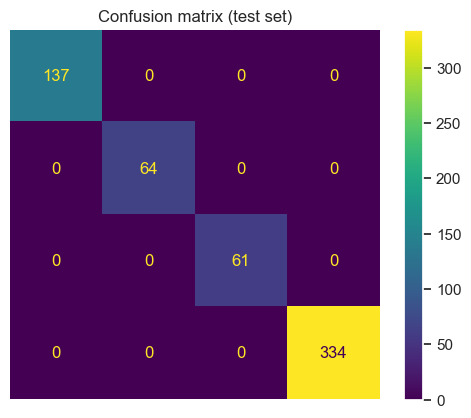

In [47]:
train_pred_y2 = grid_search2.predict(train_x)
test_pred_y2 = grid_search2.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y2)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y2)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

# Random Forest Classifier :

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [48]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_param = [{'n_estimators':[50,100,200],'criterion':['gini', 'entropy','log_loss'],
              'max_depth':[2,3,4,5],'max_features':['sqrt','log2']
             }]
grid_search3 = GridSearchCV(rnd_clf,rnd_param,cv=3,scoring='accuracy')
grid_search3.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy')

In [49]:
grid_search3.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [50]:
RNF = grid_search3.best_estimator_

In [51]:
print ('Accuarcy for Random Forest Classifier = ', grid_search3.best_score_)

Accuarcy for Random Forest Classifier =  0.9928567874019416


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

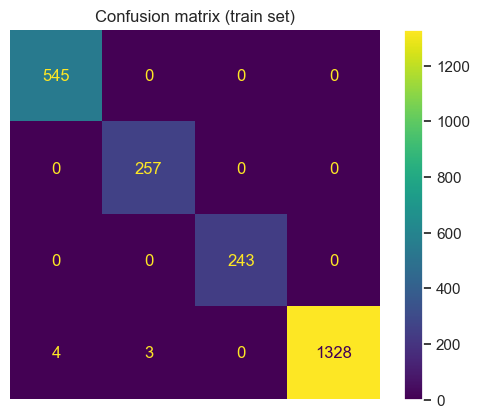

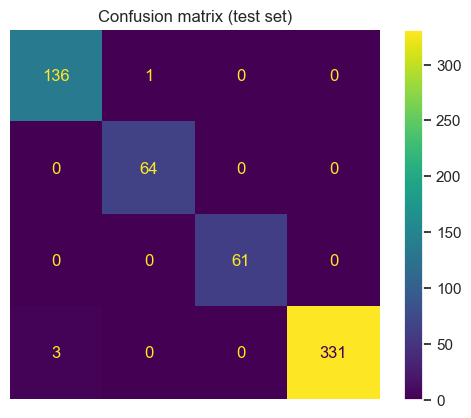

In [52]:
train_pred_y3 = grid_search3.predict(train_x)
test_pred_y3 = grid_search3.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y3)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y3)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

# K Neighbors Cassifier :

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_param = [{'n_neighbors':[3,5,8,12],'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute']
             }]
grid_search4 = GridSearchCV(knn_clf,knn_param,cv=3,scoring='accuracy')
grid_search4.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [3, 5, 8, 12],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [54]:
grid_search4.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}

In [55]:
KNN=grid_search4.best_estimator_

In [56]:
print ('Accuarcy for K Neighbors Classifier = ', grid_search4.best_score_)

Accuarcy for K Neighbors Classifier =  0.8176450533265994


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

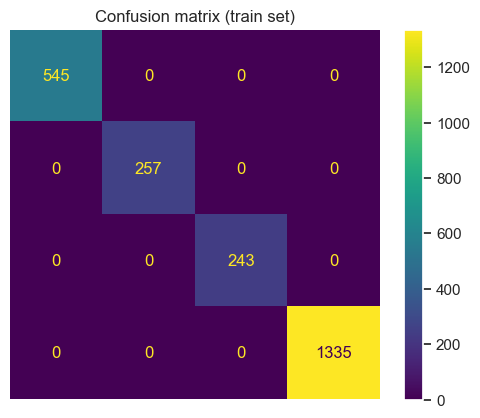

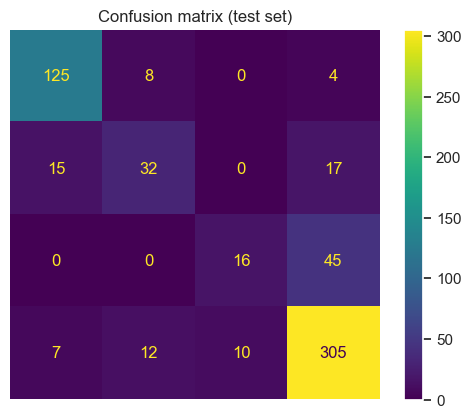

In [57]:
train_pred_y4 = grid_search4.predict(train_x)
test_pred_y4 = grid_search4.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y4)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y4)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

# Gaussian Naive bayes :

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [58]:
from sklearn.naive_bayes import GaussianNB
Gau_clf = GaussianNB()
Gau_param = [{'var_smoothing':[1e-9]
             }]
grid_search5 = GridSearchCV(Gau_clf,Gau_param,cv=3,scoring='accuracy')
grid_search5.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [1e-09]}], scoring='accuracy')

In [59]:
grid_search5.best_params_

{'var_smoothing': 1e-09}

In [60]:
GNB=grid_search5.best_estimator_

In [61]:
print ('Accuarcy for gaussian naive bayes Classifier = ', grid_search5.best_score_)

Accuarcy for gaussian naive bayes Classifier =  0.8142881192804801


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

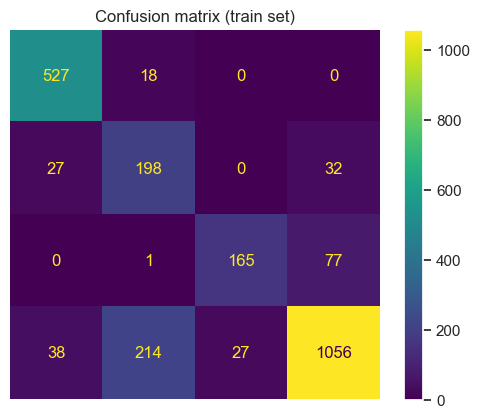

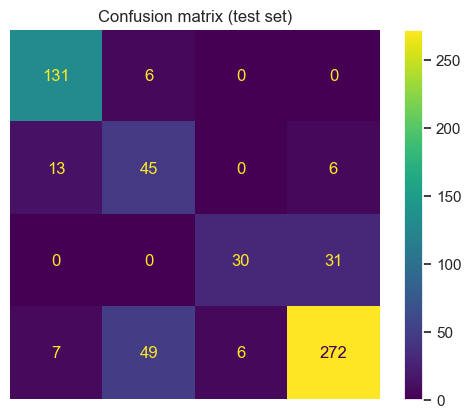

In [62]:
train_pred_y5 = grid_search5.predict(train_x)
test_pred_y5 = grid_search5.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y5)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y5)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

### Evalute the performance of the classifier by doing ROC curve showing a specifc class (One Vs All) which is trade off between true positive rate and false positive 

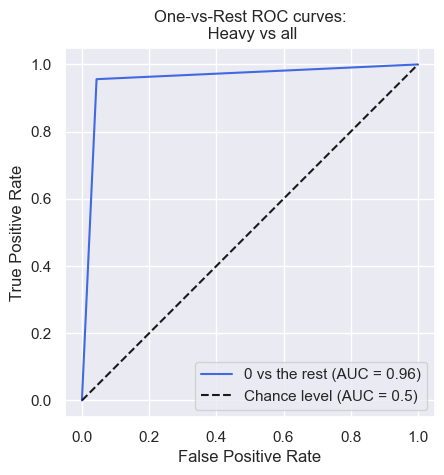

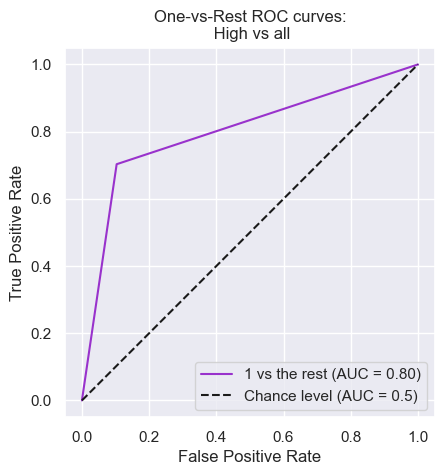

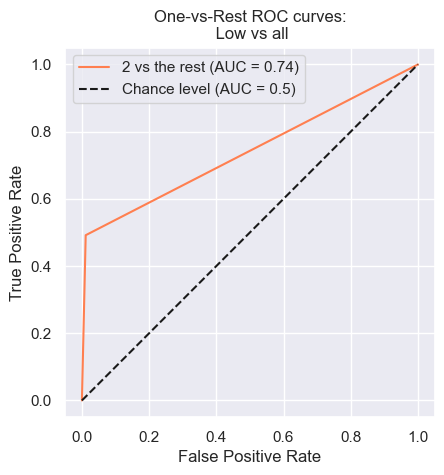

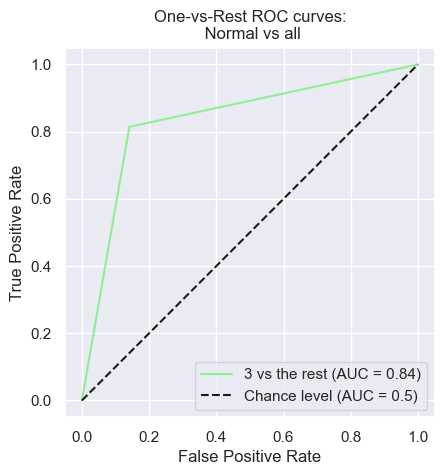

In [74]:
label_binarizer = LabelBinarizer().fit(train_y)
y_onehot_test = label_binarizer.transform(test_y)
label_binarizer1 = LabelBinarizer().fit(train_pred_y5)
y_score = label_binarizer1.transform(test_pred_y5)
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="royalblue",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Heavy vs all")
plt.legend()
plt.show()

class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorchid",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n High vs all")
plt.legend()
plt.show()

class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="coral",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Low vs all")
plt.legend()
plt.show()

class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="lightgreen",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n Normal vs all")
plt.legend()
plt.show()


# Nearest Centroid : 

### trying differnet paramters using grid search to find the best paramters to get the best estimator from this classifier then finding the score for it

In [63]:
from sklearn.neighbors import NearestCentroid
NC_clf = NearestCentroid()
NC_param = [{ 'shrink_threshold':[None,0.3,0.6,0.9]
             }]
grid_search7 = GridSearchCV(NC_clf,NC_param,cv=3,scoring='accuracy')
grid_search7.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=NearestCentroid(),
             param_grid=[{'shrink_threshold': [None, 0.3, 0.6, 0.9]}],
             scoring='accuracy')

In [64]:
grid_search7.best_params_

{'shrink_threshold': 0.6}

In [65]:
NC=grid_search7.best_estimator_

In [66]:
print ('Accuarcy for Nc Classifier = ', grid_search7.best_score_)

Accuarcy for Nc Classifier =  0.5588318441272978


### make a confusion matrix for the training and testing sets to get a summary of the number of the correct and incorrect predictions made by this classifier

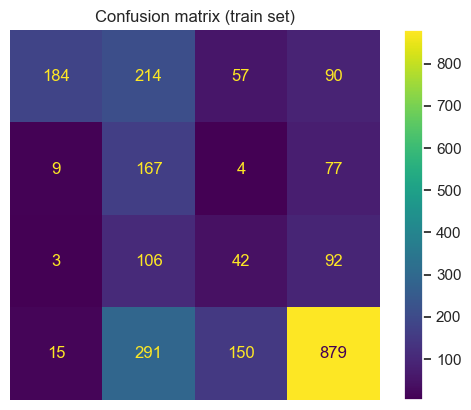

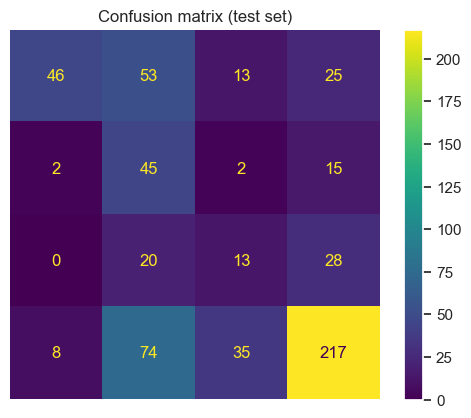

In [67]:
train_pred_y7 = grid_search7.predict(train_x)
test_pred_y7 = grid_search7.predict(test_x)
ConfusionMatrixDisplay.from_predictions(train_y, train_pred_y7)
plt.axis('off')
plt.title("Confusion matrix (train set)")
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y7)
plt.title("Confusion matrix (test set)")
plt.axis('off')
plt.show()

### There is a function named benchmark that will get us the train and test time and accuarcy for each classifier then there is scatter plot that shows the trade off between the accuarcy and time for each classifier and it shows that in the training and the test sets the Decision tree has the most accuracy

In [68]:
from sklearn import metrics
from sklearn.utils.extmath import density
import time

def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time.time()
    clf.fit(train_x, train_y)
    train_time = time.time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time.time()
    pred = clf.predict(test_x)
    test_time = time.time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(test_y, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time
    
results = []
for clf, name in (
   (log_reg,'Logistic Regression'),(DTC,'Decision Tree'),(svc,'SVC'),(RNF,'Random Forest'),
    (KNN,'K Neighors'),(GNB,'Gaussian naive bayes'),(NC,'Nearst Centroid'),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=50, max_iter=2000, random_state=42)
train time: 1.14s
test time:  0.00113s
accuracy:   0.906
dimensionality: 9
density: 1.0


Decision Tree
________________________________________________________________________________
Training: 
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
train time: 0.00499s
test time:  0.001s
accuracy:   1.0

SVC
________________________________________________________________________________
Training: 
SVC(C=50, degree=1, kernel='linear', random_state=42)
train time: 4.71s
test time:  0.0127s
accuracy:   0.906
dimensionality: 9
density: 1.0


Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)
train time: 0.41s
test time:  0.016s
accuracy:   0.993

K Neighors
__________________

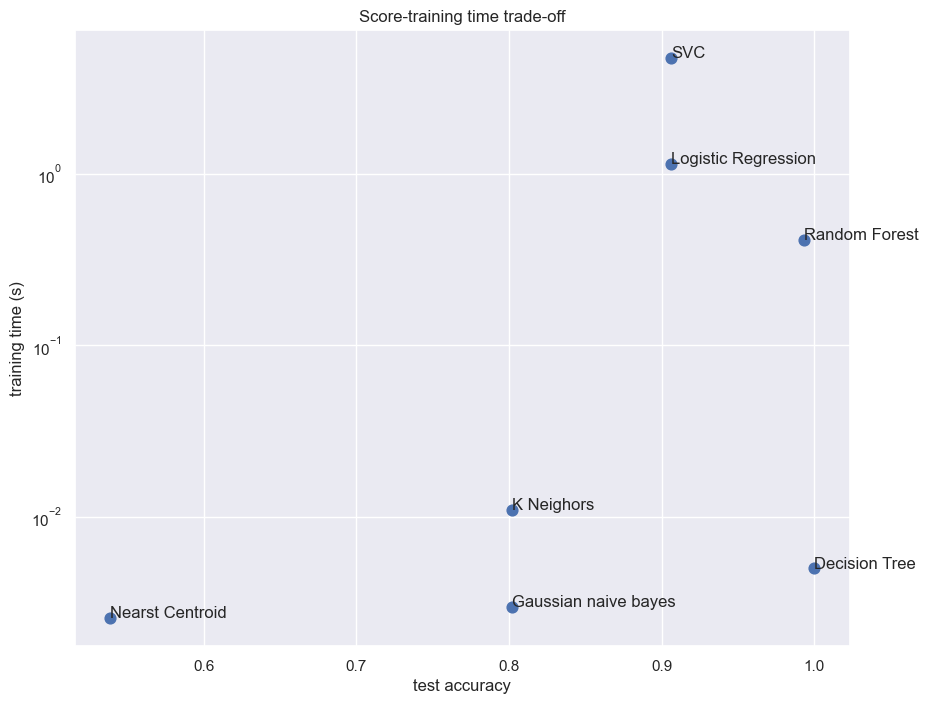

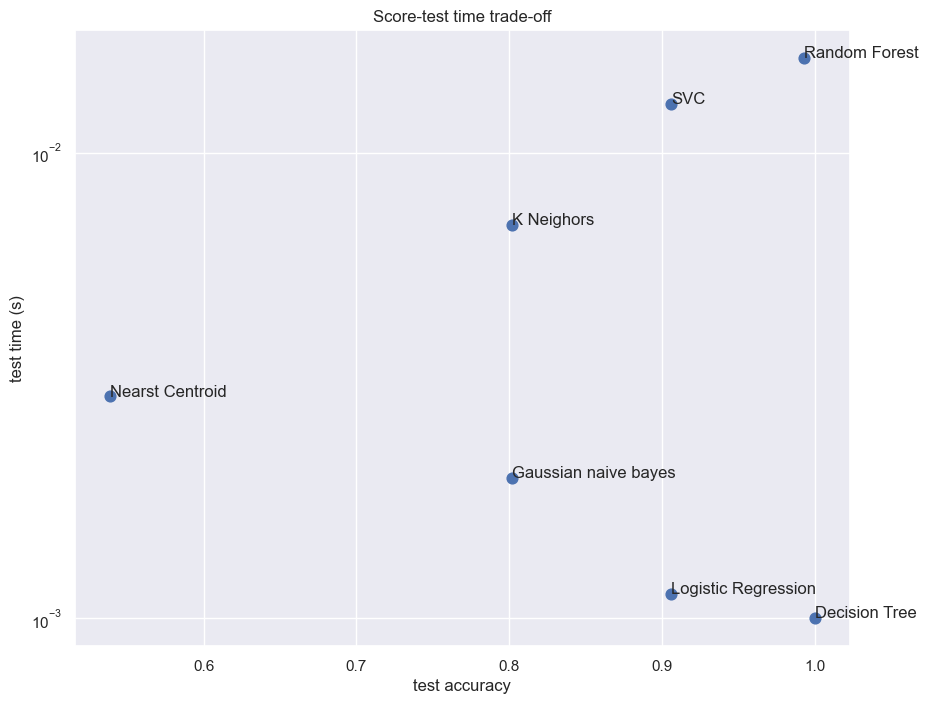

In [69]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))



### Compraing the accuracy between the classifiers

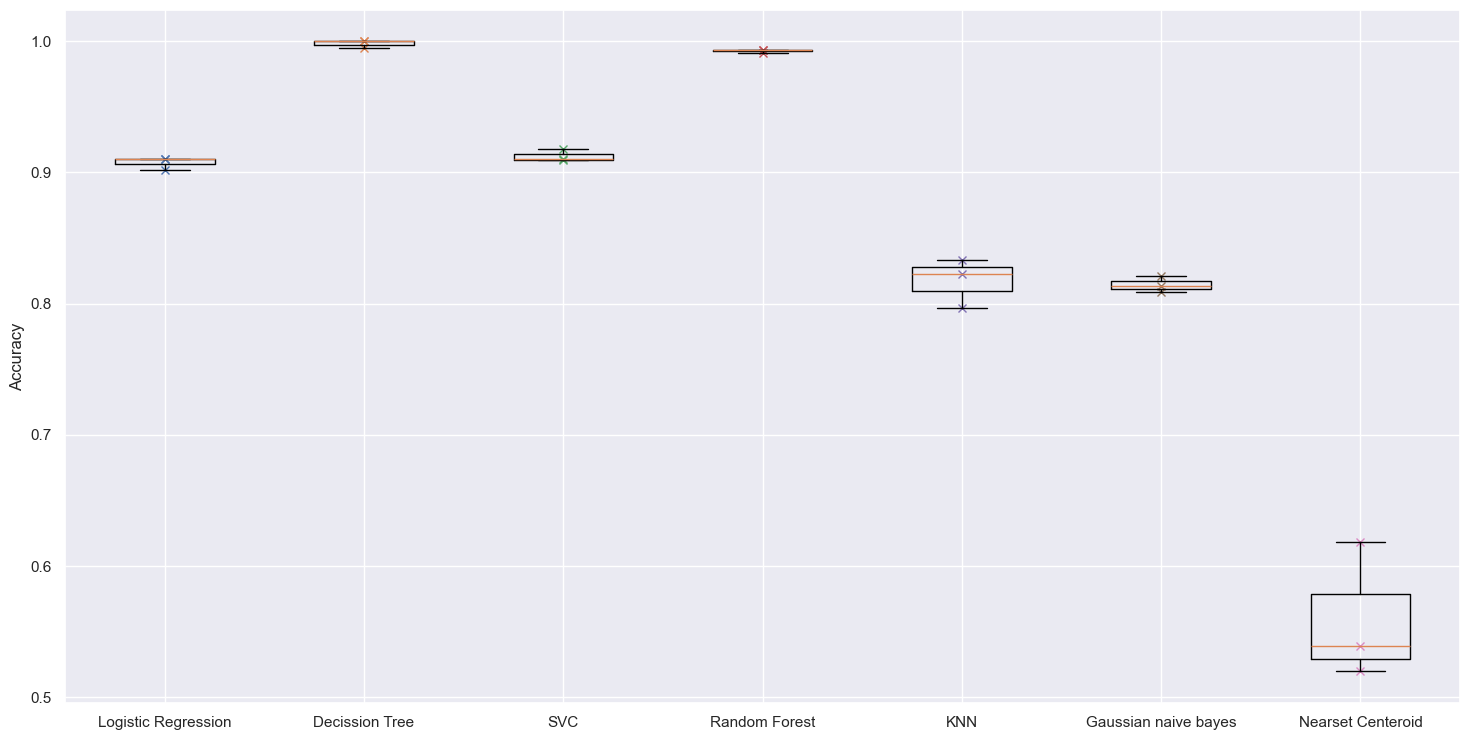

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

log_scores = cross_val_score(log_reg, train_x, train_y,cv=3)
DTC_scores = cross_val_score(DTC, train_x, train_y, cv=3)
SVC_scores = cross_val_score(svc, train_x, train_y, cv=3)
RNF_scores = cross_val_score(RNF, train_x, train_y, cv=3)
KNN_scores = cross_val_score(KNN, train_x, train_y, cv=3)
GNB_scores = cross_val_score(GNB, train_x, train_y, cv=3)
NC_scores = cross_val_score(NC, train_x, train_y, cv=3)
plt.figure(figsize=(18, 9))
plt.plot([1]*3, log_scores, "x")
plt.plot([2]*3, DTC_scores, "x")
plt.plot([3]*3, SVC_scores, "x")
plt.plot([4]*3 ,RNF_scores , "x")
plt.plot([5]*3, KNN_scores, "x")
plt.plot([6]*3,GNB_scores , "x")
plt.plot([7]*3, NC_scores, "x")

plt.boxplot([log_scores,DTC_scores,SVC_scores,RNF_scores,KNN_scores,GNB_scores,NC_scores],
            labels=('Logistic Regression',"Decission Tree","SVC","Random Forest","KNN","Gaussian naive bayes","Nearset Centeroid"))
plt.ylabel("Accuracy")
plt.show()

### Getting the precision score, recall score and f1 score for each one of the classifiers and the values are shown in the table below
  

In [76]:
from sklearn.metrics import precision_score, recall_score ,f1_score
p = precision_score(test_pred_y,test_y,average='macro')
r = recall_score(test_pred_y,test_y,average='macro')
f = f1_score(test_pred_y,test_y,average='macro')

p1 = precision_score(test_pred_y1,test_y,average='macro')
r1 = recall_score(test_pred_y1,test_y,average='macro')
f1 = f1_score(test_pred_y1,test_y,average='macro')

p2 = precision_score(test_pred_y2,test_y,average='macro')
r2 = recall_score(test_pred_y2,test_y,average='macro')
f2 = f1_score(test_pred_y2,test_y,average='macro')

p3 = precision_score(test_pred_y3,test_y,average='macro')
r3 = recall_score(test_pred_y3,test_y,average='macro')
f3 = f1_score(test_pred_y3,test_y,average='macro')

p4 = precision_score(test_pred_y4,test_y,average='macro')
r4 = recall_score(test_pred_y4,test_y,average='macro')
f4 = f1_score(test_pred_y4,test_y,average='macro')

p5 = precision_score(test_pred_y5,test_y,average='macro')
r5 = recall_score(test_pred_y5,test_y,average='macro')
f5 = f1_score(test_pred_y5,test_y,average='macro')

p7 = precision_score(test_pred_y7,test_y,average='macro')
r7 = recall_score(test_pred_y7,test_y,average='macro')
f7 = f1_score(test_pred_y7,test_y,average='macro')




#### we can conclude from the table that Decision tree classifiers has the best recall,precision and f1 score, while the nearest centorid has the worse recall,precision and f1 score.

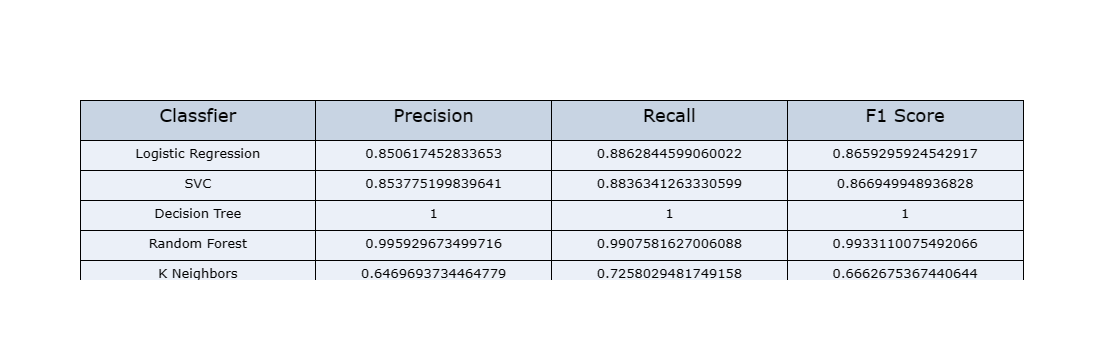

In [79]:
import plotly.graph_objects as go
fig= go.Figure(data=[go.Table(
    header=dict(values=['Classfier','Precision','Recall','F1 Score'],
                font=dict(color='black',size=18),height=40,line_color='black'),      
                  cells=dict(values=[['Logistic Regression', 'SVC','Decision Tree','Random Forest', 
                                      'K Neighbors','Gaussian naive bayes','Nearest Centeroid']
                    ,[p,p1,p2,p3,p4,p5,p7],[r,r1,r2,r3,r4,r5,r7],[f,f1,f2,f3,f4,f5,f7]],font=dict(color='black',size=13),height=30,line_color='black'))
                     ])
fig.show()